# import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# input data

In [3]:
df_1 = pd.read_excel (r'迴歸資料.xlsx', sheet_name='2020')
df_2 = pd.read_excel (r'迴歸資料.xlsx', sheet_name='2021')
df_3 = df_1.append(df_2).reset_index().drop("index",axis=1)
df_3.rename(columns={"Unnamed: 0": "movie"}, inplace=True)
df_3.set_index('movie', inplace=True)

df_3["box_office_million"] = df_3["box_office"] / 1000000
df_4 = df_3.drop(['box_office'], axis=1)
df_5 = df_4[:25]

X = df_4.iloc[:, df_4.columns != 'box_office_million']
Y = df_4.loc[:, df_4.columns == 'box_office_million']
model_x = X.iloc[:25]
model_y = Y.iloc[:25]

predict_x = X.iloc[25:]
predict_y = Y.iloc[25:]


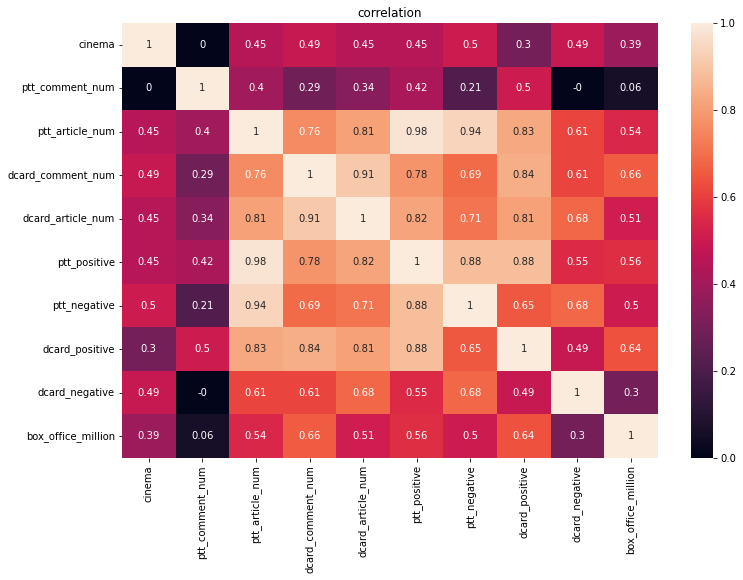

In [4]:
matrix = df_5.corr().round(2)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('correlation')
sns.heatmap(matrix, annot=True)
plt.show()

In [5]:
lin_model = smf.ols("box_office_million ~ dcard_positive", data=df_4).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     box_office_million   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     36.89
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           6.91e-07
Time:                        19:31:41   Log-Likelihood:                -195.94
No. Observations:                  36   AIC:                             395.9
Df Residuals:                      34   BIC:                             399.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6650     12.003      0.472      0.640     -18.728      30.058
dcard_positive    12.4265      2.046      6.074      0.000       8.269      16.584
==============================================================================
Omnibus:                        8.039   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.025
Skew:                           0.508   Prob(JB):                      0.00666
Kurtosis:                       5.377   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
lin_model = smf.ols("box_office_million ~ dcard_positive+dcard_comment_num", data=df_4).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     box_office_million   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     19.06
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           3.14e-06
Time:                        19:31:44   Log-Likelihood:                -195.35
No. Observations:                  36   AIC:                             396.7
Df Residuals:                      33   BIC:                             401.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2515     13.657     -0.092      0.928     -29.036      26.533
dcard_positive        9.3372      3.568      2.617      0.013       2.077      16.597
dcard_comment_num     0.1032      0.098      1.056      0.299      -0.096       0.302
==============================================================================
Omnibus:                        7.025   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.079
Skew:                           0.546   Prob(JB):                       0.0290
Kurtosis:                       4.878   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""